In [2]:
import pandas as pd
import warnings
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import os
warnings.filterwarnings("ignore")

In [3]:
os.chdir(R"D:\Study\Python programming\Case Study Clustering")
os.getcwd()

'D:\\Study\\Python programming\\Case Study Clustering'

In [4]:
data=pd.read_csv("Mall_Customers.csv")
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
(data.duplicated()==1).sum()

0

In [7]:
data.Genre.value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

In [8]:
data.groupby("Genre").mean().drop(columns=["CustomerID"])

,Age,Annual Income (k$),Spending Score (1-100)
Genre,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


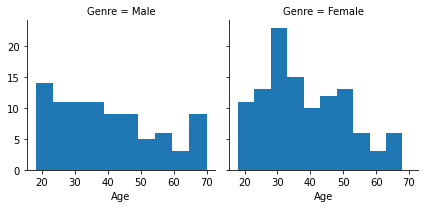

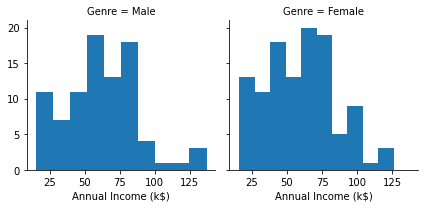

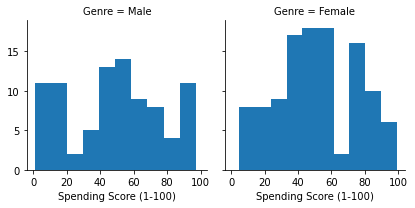

In [149]:
fct=sns.FacetGrid(data,col="Genre")
fct.map(plt.hist,"Age")

fct=sns.FacetGrid(data,col="Genre")
fct.map(plt.hist,"Annual Income (k$)")

fct=sns.FacetGrid(data,col="Genre")
fct.map(plt.hist,"Spending Score (1-100)")

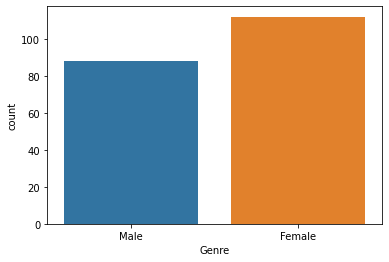

In [150]:
sns.countplot(data.Genre)
plt.show()

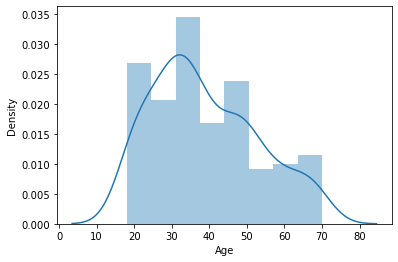

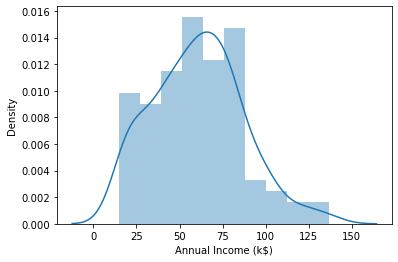

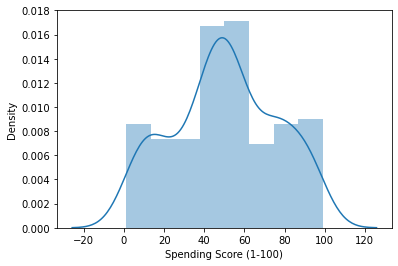

In [151]:
sns.distplot(data.Age)
plt.show()

sns.distplot(data["Annual Income (k$)"])
plt.show()

sns.distplot(data["Spending Score (1-100)"])
plt.show()

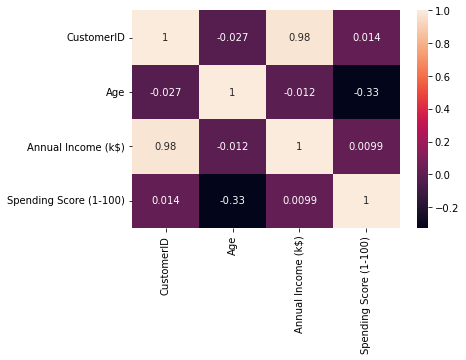

In [152]:
cor=data.corr()
sns.heatmap(cor,annot=True)
plt.show()

In [7]:
data_dropped=data.drop(columns=["CustomerID"])

In [8]:
data_dummy=pd.get_dummies(data_dropped["Genre"])
data_dummy

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
195,1,0
196,1,0
197,0,1
198,0,1


In [11]:
data_encoded=pd.concat([data_dropped,data_dummy],axis=1)
data_encoded

,Genre,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,Male,19,15,39,0,1
1,Male,21,15,81,0,1
2,Female,20,16,6,1,0
3,Female,23,16,77,1,0
4,Female,31,17,40,1,0
...,...,...,...,...,...,...
195,Female,35,120,79,1,0
196,Female,45,126,28,1,0
197,Male,32,126,74,0,1
198,Male,32,137,18,0,1


In [12]:
data_encoded=data_encoded.drop(columns=["Genre","Male"])
data_encoded

,Age,Annual Income (k$),Spending Score (1-100),Female
0,19,15,39,0
1,21,15,81,0
2,20,16,6,1
3,23,16,77,1
4,31,17,40,1
...,...,...,...,...
195,35,120,79,1
196,45,126,28,1
197,32,126,74,0
198,32,137,18,0


In [13]:
MinMax=MinMaxScaler()
data_scaled=MinMax.fit_transform(data_encoded)
data_scaled

array([[0.01923077, 0.        , 0.3877551 , 0.        ],
       [0.05769231, 0.        , 0.81632653, 0.        ],
       [0.03846154, 0.00819672, 0.05102041, 1.        ],
       [0.09615385, 0.00819672, 0.7755102 , 1.        ],
       [0.25      , 0.01639344, 0.39795918, 1.        ],
       [0.07692308, 0.01639344, 0.76530612, 1.        ],
       [0.32692308, 0.02459016, 0.05102041, 1.        ],
       [0.09615385, 0.02459016, 0.94897959, 1.        ],
       [0.88461538, 0.03278689, 0.02040816, 0.        ],
       [0.23076923, 0.03278689, 0.7244898 , 1.        ],
       [0.94230769, 0.03278689, 0.13265306, 0.        ],
       [0.32692308, 0.03278689, 1.        , 1.        ],
       [0.76923077, 0.04098361, 0.14285714, 1.        ],
       [0.11538462, 0.04098361, 0.7755102 , 1.        ],
       [0.36538462, 0.04098361, 0.12244898, 0.        ],
       [0.07692308, 0.04098361, 0.79591837, 0.        ],
       [0.32692308, 0.04918033, 0.34693878, 1.        ],
       [0.03846154, 0.04918033,

performing the clustering for k1
performing the clustering for k2
performing the clustering for k3
performing the clustering for k4
performing the clustering for k5
performing the clustering for k6
performing the clustering for k7
performing the clustering for k8
performing the clustering for k9
1 : 0.6490097132098148
2 : 0.40553484398215545
3 : 0.3589796046816035
4 : 0.3120036114813609
5 : 0.2881428244097879
6 : 0.2618458769175322
7 : 0.24350280158175772
8 : 0.2272374023797662
9 : 0.21090120915584415
1 : 86.68148216035942
2 : 37.27227241211875
3 : 29.552857611943857
4 : 22.390960011928552
5 : 19.08431819875017
6 : 16.434552548082582
7 : 14.210424128609384
8 : 12.303508767355307
9 : 10.581551403138167


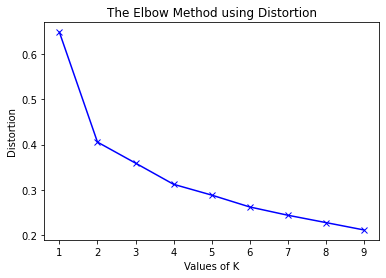

1 : 86.68148216035942
2 : 37.27227241211875
3 : 29.552857611943857
4 : 22.390960011928552
5 : 19.08431819875017
6 : 16.434552548082582
7 : 14.210424128609384
8 : 12.303508767355307
9 : 10.581551403138167


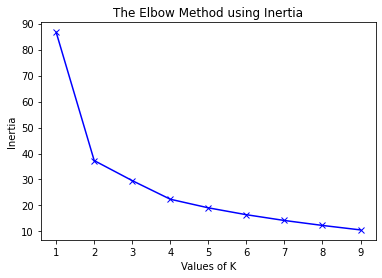

In [33]:

distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 


#Based on Distortion  
for k in K:     
 
    print("performing the clustering for k"+ str(k))
    kmeanModel = KMeans(n_clusters=k).fit(data_scaled) 
    kmeanModel.fit(data_scaled)     
      
    distortions.append(sum(np.min(cdist(data_scaled, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / data_scaled.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(data_scaled, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / data_scaled.shape[0] #Distortion Values
    mapping2[k] = kmeanModel.inertia_ #Inertia Values
    
    
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val)) 
    
for key,val in mapping2.items(): 
    print(str(key)+' : '+str(val)) 
    
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

#Based on Inertia
for key,val in mapping2.items(): 
    print(str(key)+' : '+str(val)) 
    
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

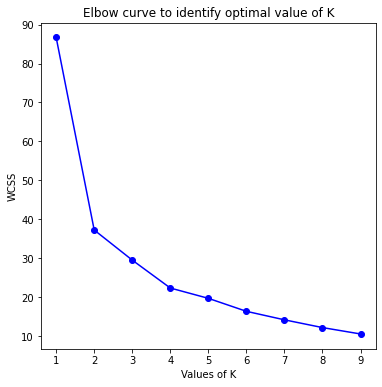

In [78]:
wcss = []
for k in range(1, 10):
    km = KMeans(n_clusters=k)
    km.fit(data_scaled)
    wcss.append(km.inertia_)


plt.figure(figsize=(6, 6))
plt.plot(range(1, 10), wcss, '-o', c = 'blue')
plt.title("Elbow curve to identify optimal value of K")
plt.xlabel('Values of K')
plt.ylabel('WCSS');

In [18]:
kmeans=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=900,
    n_clusters=2, n_init=10,
    random_state=0, tol=0.0001, verbose=0)
kmeans.fit(data_scaled)

KMeans(algorithm='auto', max_iter=900, n_clusters=2, random_state=0)

In [19]:
label=kmeans.predict(data_scaled)
print("Silhouette Score is :" + str(silhouette_score(data_scaled,label)))

Silhouette Score is :0.5194624832665107


In [20]:
print("Within Cluster sum Square (WCSS) is:" + str(kmeans.inertia_))
print("\n")
print("Clusters:" + str(kmeans.labels_))
print("\n")
print("Centroids :" + str(kmeans.cluster_centers_))

Within Cluster sum Square (WCSS) is:37.27227241211875


Clusters:[0 0 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 1 1
 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0
 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 0 0 1
 1 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 1
 0 1 0 1 1 1 1 0 1 1 1 1 0 0 0]


Centroids :[[ 4.19361888e-01  3.87108793e-01  4.84809833e-01 -4.44089210e-16]
 [ 3.86504121e-01  3.62704918e-01  5.15579446e-01  1.00000000e+00]]


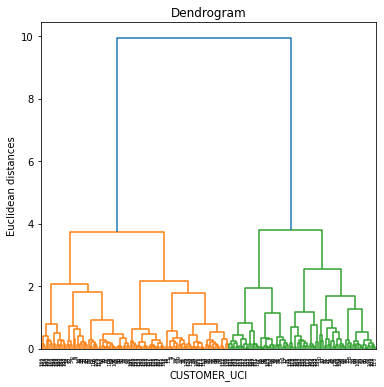

In [21]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(6,6))
dendrogram = sch.dendrogram(sch.linkage(data_scaled, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('CUSTOMER_UCI')
plt.ylabel('Euclidean distances')
plt.show()

In [22]:
label_predicted=pd.DataFrame(label)
type(label_predicted)

pandas.core.frame.DataFrame

In [23]:
cluster_data=pd.concat([data,label_predicted],axis=1).rename(columns={0:"Cluster"})

In [24]:
display(cluster_data)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,1
197,198,Male,32,126,74,0
198,199,Male,32,137,18,0


In [25]:
(cluster_data["Cluster"].value_counts()/len(cluster_data))*100

1    56.0
0    44.0
Name: Cluster, dtype: float64